<h3>Preparing baseline model to classify images as food or non food.<h3>

In [ ]:
import torchvision
import torch
from func.get_data import get_food101
import os
from pathlib import Path

DATA_DIR = Path(os.getenv("DATA_DIR"))
TRANSFORMS = torchvision.models.EfficientNet_B2_Weights.DEFAULT.transforms()

device = "cuda" if torch.cuda.is_available() else "cpu"

train_data, test_data, class_names = get_food101(transform=TRANSFORMS, data_path=DATA_DIR/"data_food")
class_names[:10]

Preparing food101 dataset in data/data_food...


['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
from func.get_data import get_images_from_pexels
import os
from pathlib import Path
import torch
from torch import nn

output_dir = Path(os.getenv("DATA_DIR")) / "data_nonfood"
classes_file= Path(os.getenv("CLASSES_DIR")) / "nonfood_classes.txt"
api_key = os.getenv("PEXELS_API_KEY")
stats = get_images_from_pexels(output_dir= output_dir, api_key = api_key, images_per_class = 200, min_width=250, classes_file= classes_file, overwrite= True)

Loaded 24 classes from nonfood_classes.txt
Starting download: 200 images per class
Total classes: 24
Minimum width: 250px

Downloaded 200/200 images for 'vehicle'
Downloaded 200/200 images for 'device'
Downloaded 200/200 images for 'building'
Downloaded 200/200 images for 'flower'
Downloaded 200/200 images for 'furniture'
Downloaded 200/200 images for 'instrument'
Downloaded 200/200 images for 'clothing'
Downloaded 42/200 images for 'jewelery'
Downloaded 200/200 images for 'book'
Downloaded 200/200 images for 'window'
Downloaded 200/200 images for 'door'
Downloaded 200/200 images for 'decoration'
Downloaded 200/200 images for 'wall'
Downloaded 200/200 images for 'person'
Downloaded 200/200 images for 'cat'
Downloaded 200/200 images for 'dog'
Downloaded 200/200 images for 'glass'
Downloaded 200/200 images for 'painting'
Downloaded 200/200 images for 'landscape'
Downloaded 200/200 images for 'fence'
Downloaded 200/200 images for 'garden'
Downloaded 200/200 images for 'sink'
Downloaded 20

In [ ]:
from func.data_setup import create_pytorch_dataset

data_dir = Path(os.getenv("DATA_DIR"))
food_dir = Path(data_dir, "data_food", "food-101", "images")
nonfood_dir = Path(data_dir) / "data_nonfood"
output_dir = Path(data_dir) / "dataset"

create_pytorch_dataset(food_dir= food_dir, nonfood_dir= nonfood_dir, output_dir= output_dir,
                       train_ratio= 0.8, seed= 42,
                       max_food_images=100) #101 food classes * 100 = 10100 food images
                                                 #24 nonfood classes * ~200  = 4800 nonfood images

Processing food images...
Class 'escargots': 80 train, 20 test images.
Class 'beignets': 80 train, 20 test images.
Class 'creme_brulee': 80 train, 20 test images.
Class 'pulled_pork_sandwich': 80 train, 20 test images.
Class 'prime_rib': 80 train, 20 test images.
Class 'red_velvet_cake': 80 train, 20 test images.
Class 'macarons': 80 train, 20 test images.
Class 'dumplings': 80 train, 20 test images.
Class 'bibimbap': 80 train, 20 test images.
Class 'spring_rolls': 80 train, 20 test images.
Class 'grilled_cheese_sandwich': 80 train, 20 test images.
Class 'churros': 80 train, 20 test images.
Class 'macaroni_and_cheese': 80 train, 20 test images.
Class 'beef_tartare': 80 train, 20 test images.
Class 'pho': 80 train, 20 test images.
Class 'crab_cakes': 80 train, 20 test images.
Class 'cannoli': 80 train, 20 test images.
Class 'tiramisu': 80 train, 20 test images.
Class 'eggs_benedict': 80 train, 20 test images.
Class 'pancakes': 80 train, 20 test images.
Class 'miso_soup': 80 train, 20 te

{'train': {'food': 8080, 'non_food': 3713},
 'test': {'food': 2020, 'non_food': 929}}

In [ ]:
output_dir= Path(os.getenv("DATA_DIR")) / "dataset"
train_dir = output_dir / "train"
test_dir = output_dir / "test"

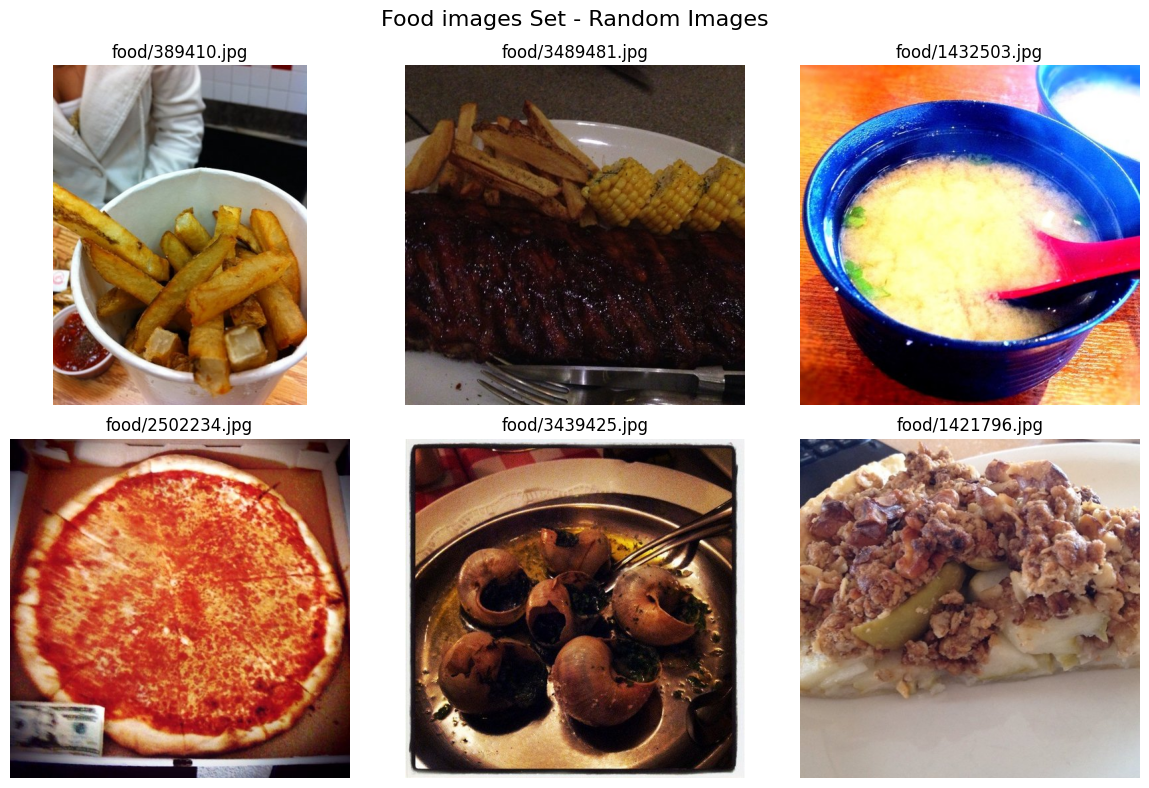

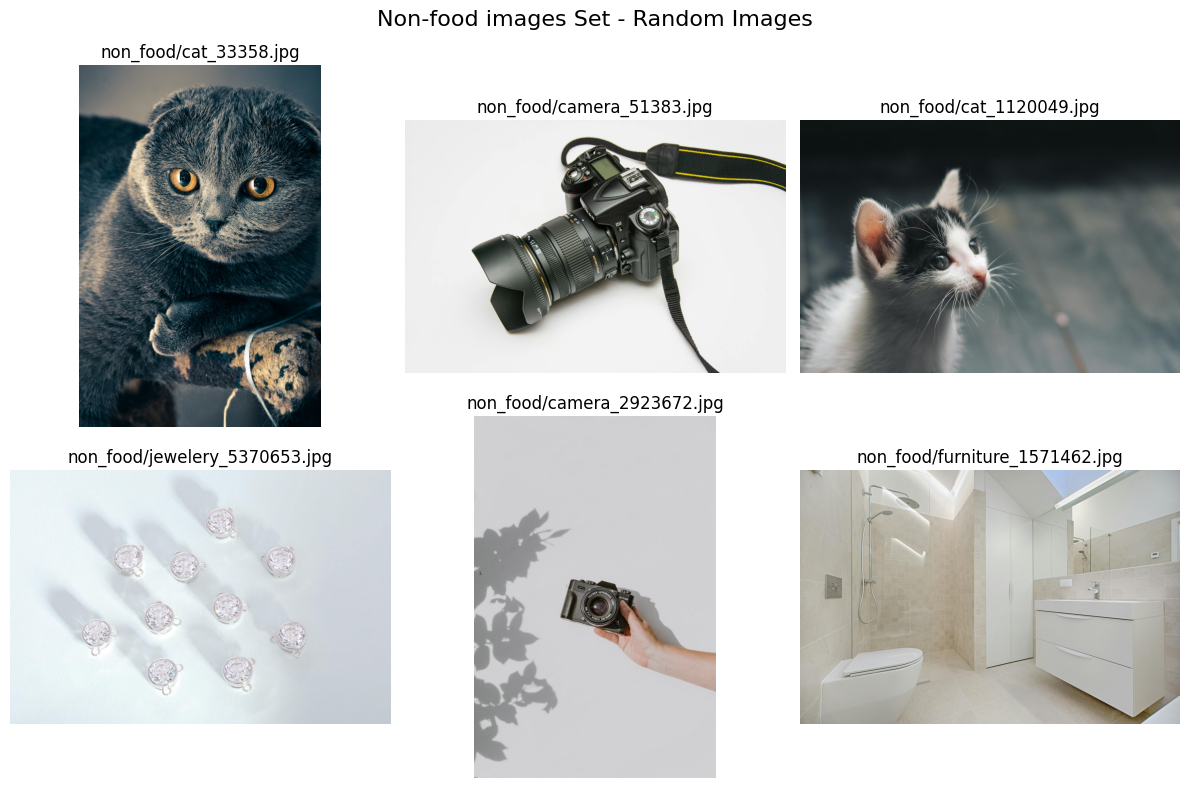

In [8]:
#checking if the images were loaded correctly
import random
import matplotlib.pyplot as plt
from PIL import Image

num_images = 6

for dir in [train_dir/"food", train_dir/"non_food"]:

    dir_path = Path(dir)
    image_files = list(dir_path.rglob('*.jpg'))

    # Select random images
    random_images = random.sample(image_files, num_images)

    # Plot
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    axes = axes.flatten()

    for idx, img_path in enumerate(random_images):
        img = Image.open(img_path)
        axes[idx].imshow(img)
        # Show class name (parent folder) and filename
        axes[idx].set_title(f'{img_path.parent.name}/{img_path.name}')
        axes[idx].axis('off')

    # Add overall title
    dir_name = "Food images" if dir_path.name == "food" else "Non-food images"
    fig.suptitle(f'{dir_name} Set - Random Images', fontsize=16)
    plt.tight_layout()
    plt.show()

In [ ]:
#no need to perform augmentations on the non-food and food images as they are quite varied already
from func.model_setup import create_effnetb2_model

model, transforms = create_effnetb2_model(num_classes=2, seed=42)
model.to(device)

Downloading: "https://download.pytorch.org/models/efficientnet_b2_rwightman-c35c1473.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b2_rwightman-c35c1473.pth


100%|██████████| 35.2M/35.2M [00:00<00:00, 177MB/s]


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [21]:
from torchvision import datasets

train_data = datasets.ImageFolder(root= train_dir,
                                  transform= transforms
                                  )
test_data = datasets.ImageFolder(root= test_dir,
                                 transform= transforms)

In [ ]:
from func.data_setup import create_dataloaders

train_dataloader, test_dataloader = create_dataloaders(train_data= train_data, test_data= test_data,
                                                        batch_size=32)

In [ ]:
from torchinfo import summary

summary(model,
        input_size=(32, 3, 224, 224), #(batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 2]              --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1408, 7, 7]     --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 

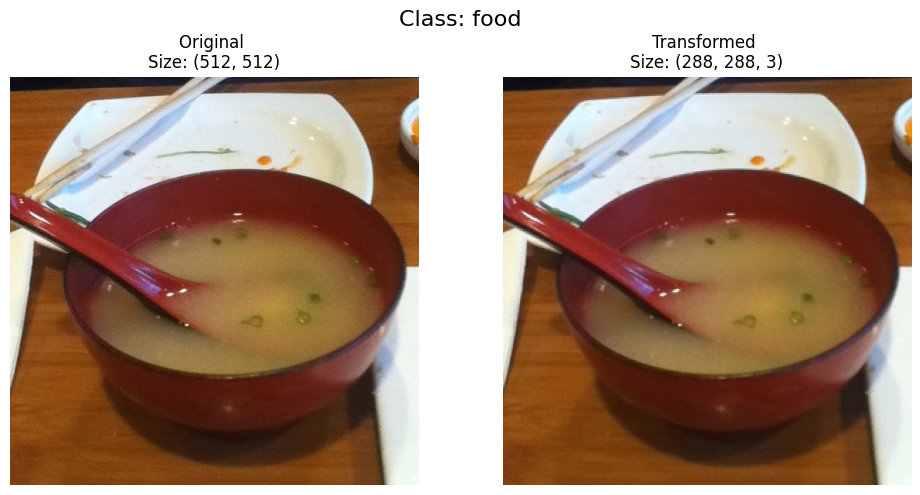

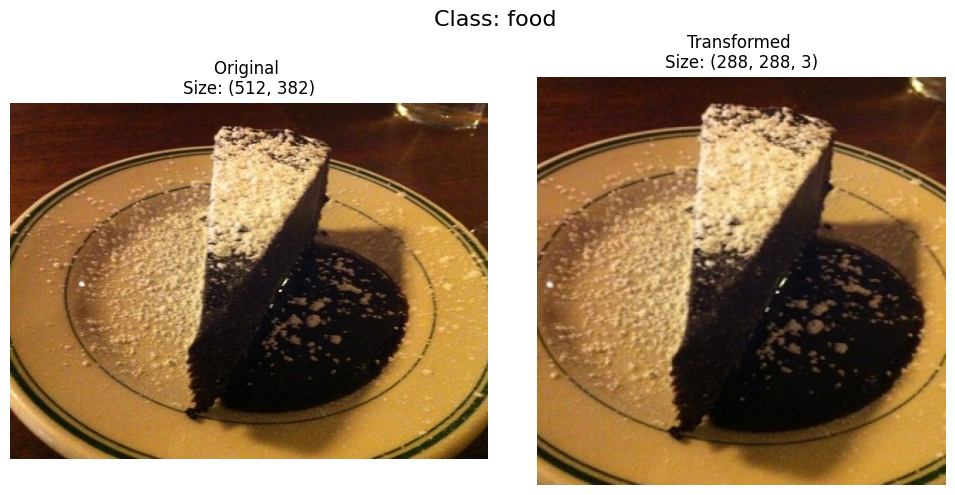

In [ ]:
from func.visuals import plot_transformed_images

plot_transformed_images(train_dir/"food",
                        transform=transforms,
                        n=2)

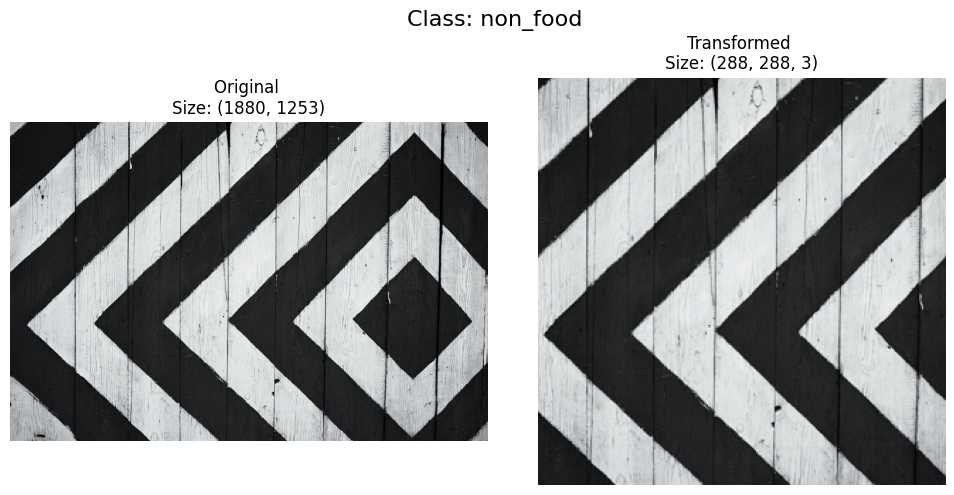

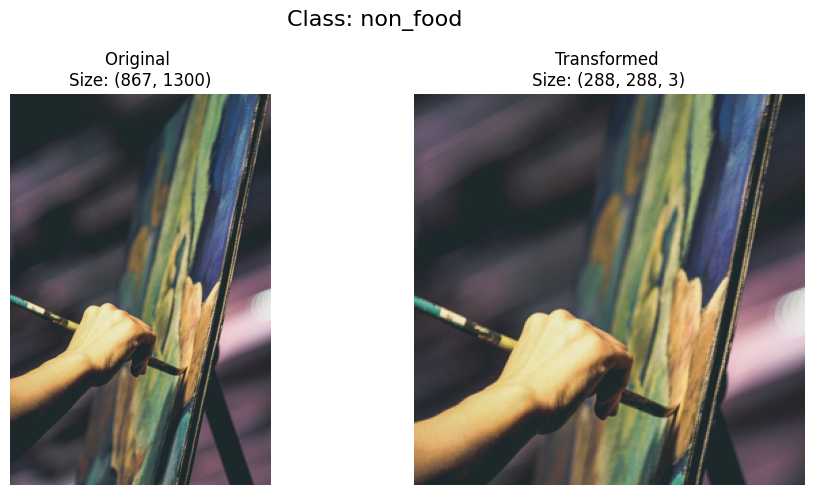

In [25]:
plot_transformed_images(train_dir/"non_food",
                        transform=transforms,
                        n=2)

In [ ]:
#create optimizer and loss function
from func.utils import set_seeds

loss_fn = nn.CrossEntropyLoss() # may add weights later

adam_optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

set_seeds(42)

In [ ]:
from func.engine import train

effnetb2_food_results = train(model= model,
                              train_dataloader= train_dataloader,
                              test_dataloader= test_dataloader,
                              optimizer= adam_optimizer,
                              loss_fn= loss_fn,
                              epochs= 5,
                              device= device
)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.0651 | train_acc: 0.9790 | test_loss: 0.0476 | test_acc: 0.9866
Epoch: 2 | train_loss: 0.0583 | train_acc: 0.9802 | test_loss: 0.0469 | test_acc: 0.9866
Epoch: 3 | train_loss: 0.0577 | train_acc: 0.9816 | test_loss: 0.0420 | test_acc: 0.9872
Epoch: 4 | train_loss: 0.0505 | train_acc: 0.9842 | test_loss: 0.0464 | test_acc: 0.9832
Epoch: 5 | train_loss: 0.0494 | train_acc: 0.9839 | test_loss: 0.0417 | test_acc: 0.9869


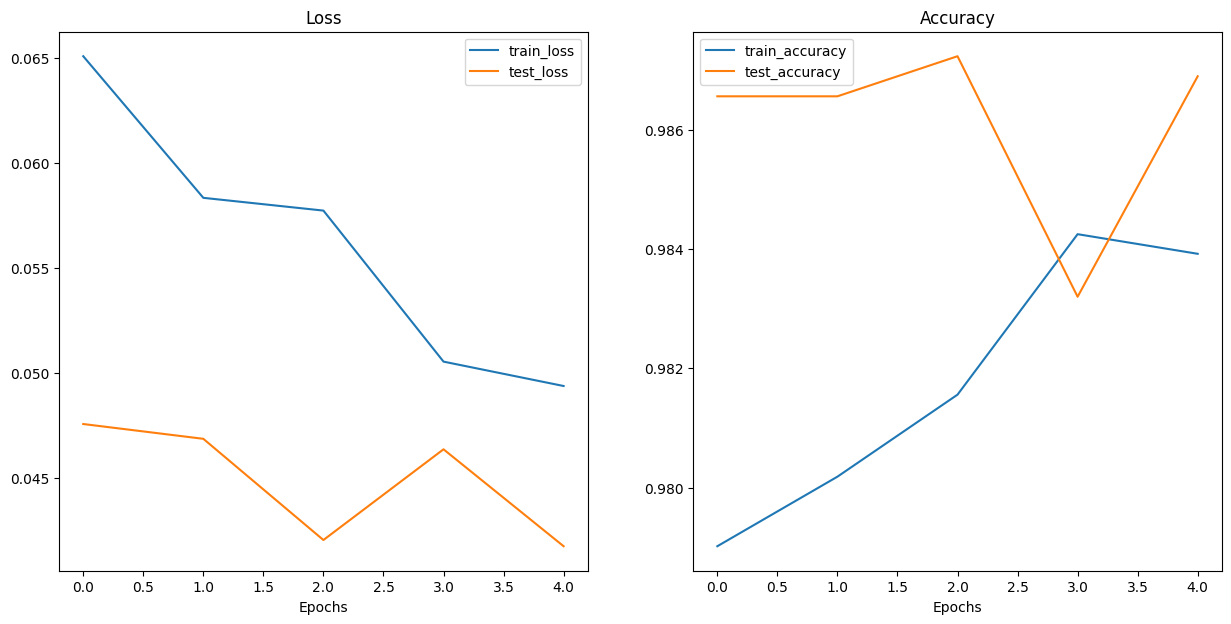

In [ ]:
from func.visuals import plot_loss_curves
# Check out the loss curves for FoodVision Big
plot_loss_curves(effnetb2_food_results)

In [ ]:
from func.utils import  save_model

# Create a model path
effnetb2_food_model_path = "09_pretrained_effnetb2_feature_extractor_food.pth"
model_dir = Path(os.getenv("MODEL_DIR"))

save_model(model=model,
                 target_dir=model_dir,
                 model_name=effnetb2_food_model_path)

[INFO] Saving model to: models/09_pretrained_effnetb2_feature_extractor_food.pth


In [32]:
from pathlib import Path

# Get the model size in bytes then convert to megabytes
pretrained_effnetb2_food101_model_size = Path(model_dir, effnetb2_food_model_path).stat().st_size // (1024*1024) # division converts bytes to megabytes (roughly)
print(f"Pretrained EffNetB2 feature extractor Food101 model size: {pretrained_effnetb2_food101_model_size} MB")

Pretrained EffNetB2 feature extractor Food101 model size: 29 MB


Try out model on tricky examples

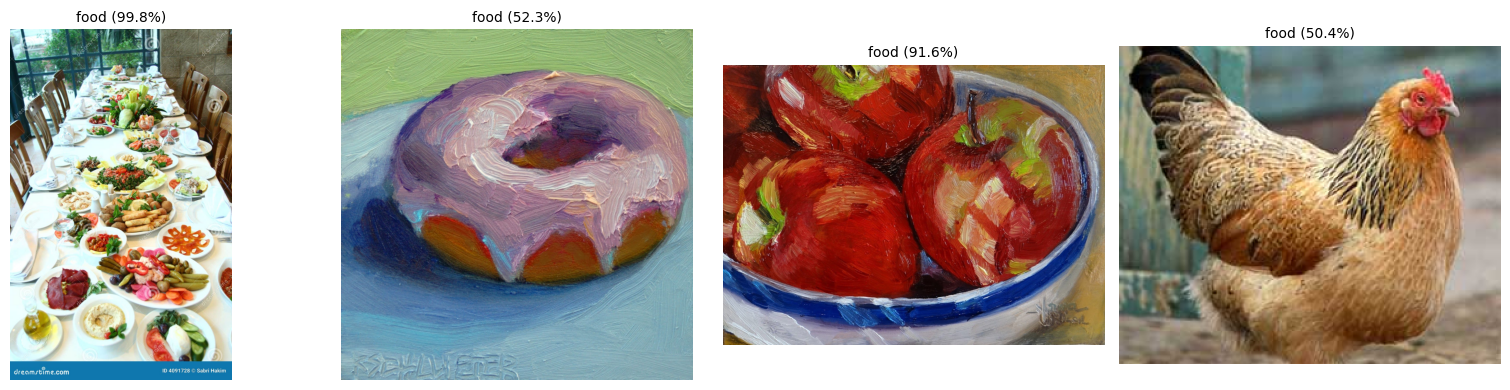

In [ ]:
from func.utils import predict_and_display
# Test out the model on some custom images from the "examples" folder
predict_and_display(model, data_dir/"examples", transforms, ["food", "non_food"], device)

So we can see that model has some problems dealing with food paintings or images that contain food but hey, chicken is food basically, right? RIGHT?